In [159]:
# Analysis of my laptop's battery life over approx 3.7 years of usage (so far)
# Windows laptop
# Report accessed by using administrator cmd prompt
# Typed in terminal powercfg/batteryreport

import pandas as pd
import datetime as dt

In [161]:
data=pd.read_html(r"C:/Windows/System32/battery-report.html") # pulls out data from suitable sources in the html page
# because more than 1 source is available, result is a list

In [162]:
print(f'Type of variable data={type(data)}')
print(f'Length: {len(data)}')

df1=data[5] # these are the data i'm interested in, may vary from report to report and person to person for sure
df2=data[6] # simply iterate over dataframes in list to see what is interesting

Type of variable data=<class 'list'>
Length: 8


In [163]:
print(df1.info()) # column names are oookay, best to rename w underscores replacing spaces; throw in lowercase as well (personal pref)
df1.columns = ['Period','Full_charge_cap','Design_cap']
df1.head()
# none of the columns have empty/missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PERIOD                197 non-null    object
 1   FULL CHARGE CAPACITY  197 non-null    object
 2   DESIGN CAPACITY       197 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB
None


,Period,Full_charge_cap,Design_cap
0,2019-10-28 - 2019-11-04,"60,142 mWh","61,908 mWh"
1,2019-11-04 - 2019-11-12,"60,411 mWh","61,908 mWh"
2,2019-11-12 - 2019-11-18,"59,917 mWh","61,908 mWh"
3,2019-11-18 - 2019-11-25,"61,053 mWh","61,908 mWh"
4,2019-11-25 - 2019-12-09,"61,053 mWh","61,908 mWh"


In [164]:
print(df2.info()) # colnames are multi-indexed; best to rename

df2.head()
# Unnamed 3_level_0 col, and nested column, is filled w null values;
# Connected_standby cols also appear to have values which can be considered missing (-)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 0_level_0, PERIOD)              197 non-null    object 
 1   (AT FULL CHARGE, ACTIVE)                  197 non-null    object 
 2   (AT FULL CHARGE, CONNECTED STANDBY)       197 non-null    object 
 3   (Unnamed: 3_level_0, Unnamed: 3_level_1)  0 non-null      float64
 4   (AT DESIGN CAPACITY, ACTIVE)              197 non-null    object 
 5   (AT DESIGN CAPACITY, CONNECTED STANDBY)   197 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.4+ KB
None


Unnamed: 0_level_0 AT FULL CHARGE                    \
                     PERIOD         ACTIVE CONNECTED STANDBY   
0  2019-10-28  - 2019-11-04        7:32:44                 -   
1  2019-11-04  - 2019-11-12        8:19:35                 -   
2  2019-11-12  - 2019-11-18        7:23:19                 -   
3  2019-11-18  - 2019-11-25        7:09:22                 -   
4  2019-11-25  - 2019-12-09        6:22:45                 -   

  Unnamed: 3_level_0 AT DESIGN CAPACITY                    
  Unnamed: 3_level_1             ACTIVE CONNECTED STANDBY  
0                NaN            7:46:02                 -  
1                NaN            8:31:58                 -  
2                NaN            7:38:03                 -  
3                NaN            7:15:23                 -  
4                NaN            6:28:07                 -

In [165]:
df2_1=df2.copy(deep=True) # create a copy of the og df2; just in case
df2_1.columns = ['Period','Full_charge_hours','Full_charge_standby','NA','Design_charge_hours','Design_charge_standby']

In [166]:
df2_1[['Full_charge_standby','Design_charge_standby']].value_counts() # verify that all the values in both cols are not required
# will get rid of those cols + NA col 
df2_2=df2_1[['Period','Full_charge_hours','Design_charge_hours']]
df2_2.head() # can merge with df1 on period col (right?)

,Period,Full_charge_hours,Design_charge_hours
0,2019-10-28 - 2019-11-04,7:32:44,7:46:02
1,2019-11-04 - 2019-11-12,8:19:35,8:31:58
2,2019-11-12 - 2019-11-18,7:23:19,7:38:03
3,2019-11-18 - 2019-11-25,7:09:22,7:15:23
4,2019-11-25 - 2019-12-09,6:22:45,6:28:07


In [167]:
all(df1['Period']==df2_2['Period']) # right

True

In [168]:
df=pd.merge(df1,df2_2,left_on='Period',right_on='Period')
df.head() # ok, just have to modify str data to numeric etc; convert types as necessary

,Period,Full_charge_cap,Design_cap,Full_charge_hours,Design_charge_hours
0,2019-10-28 - 2019-11-04,"60,142 mWh","61,908 mWh",7:32:44,7:46:02
1,2019-11-04 - 2019-11-12,"60,411 mWh","61,908 mWh",8:19:35,8:31:58
2,2019-11-12 - 2019-11-18,"59,917 mWh","61,908 mWh",7:23:19,7:38:03
3,2019-11-18 - 2019-11-25,"61,053 mWh","61,908 mWh",7:09:22,7:15:23
4,2019-11-25 - 2019-12-09,"61,053 mWh","61,908 mWh",6:22:45,6:28:07


In [169]:
df['Full_charge_cap_int']=df['Full_charge_cap'].apply(lambda x:int((x.split(' ')[0]).replace(',','')))
df['Design_cap_int']=df['Design_cap'].apply(lambda x:int((x.split(' ')[0]).replace(',','')))

def in_hours(string):
    splits=string.split(':')
    h,m,s=splits[0],splits[1],splits[2]
    res=int(h)+int(m)/60+int(s)/(60*60)
    return res

df['Full_charge_h']=df['Full_charge_hours'].apply(in_hours)
df['Design_charge_h']=df['Design_charge_hours'].apply(in_hours)
df.head()

,Period,Full_charge_cap,Design_cap,Full_charge_hours,Design_charge_hours,Full_charge_cap_int,Design_cap_int,Full_charge_h,Design_charge_h
0,2019-10-28 - 2019-11-04,"60,142 mWh","61,908 mWh",7:32:44,7:46:02,60142,61908,7.545556,7.767222
1,2019-11-04 - 2019-11-12,"60,411 mWh","61,908 mWh",8:19:35,8:31:58,60411,61908,8.326389,8.532778
2,2019-11-12 - 2019-11-18,"59,917 mWh","61,908 mWh",7:23:19,7:38:03,59917,61908,7.388611,7.634167
3,2019-11-18 - 2019-11-25,"61,053 mWh","61,908 mWh",7:09:22,7:15:23,61053,61908,7.156111,7.256389
4,2019-11-25 - 2019-12-09,"61,053 mWh","61,908 mWh",6:22:45,6:28:07,61053,61908,6.379167,6.468611


In [170]:
# w regards to period, either can replicate data in each interval 
# e.g. 2019-10-28 - 2019-11-04 can be repeated 7 times for 7 days in week (excluding 2019-11-04 itself for next week)
# OR > can just look at 1st date
# since no ML model being trained + dataset doesn't neeeed to be large; will go w latter option

df['Period']=df['Period'].apply(lambda x: x.split(' - ')[0])
df['Period_date']=pd.to_datetime(df['Period']).dt.date 

# Data cleaning done> now for manipulation and analysis

In [171]:
df['Charge_percentage']=df['Full_charge_cap_int']/df['Design_cap_int']*100
df['Hours_percentage']=df['Full_charge_h']/df['Design_charge_h']*100
print(df[['Charge_percentage','Hours_percentage']].corr()) # strong corr w each other
# like real strong
df[['Charge_percentage','Hours_percentage']]

                   Charge_percentage  Hours_percentage
Charge_percentage                1.0               1.0
Hours_percentage                 1.0               1.0


,Charge_percentage,Hours_percentage
0,97.147380,97.146127
1,97.581896,97.581223
2,96.783937,96.783466
3,98.618918,98.618076
4,98.618918,98.617254
...,...,...
192,65.413194,65.410941
193,66.820120,66.815442
194,65.460037,65.458747
195,65.829941,65.828837


c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Charge_percentage', ylabel='Hours_percentage'>

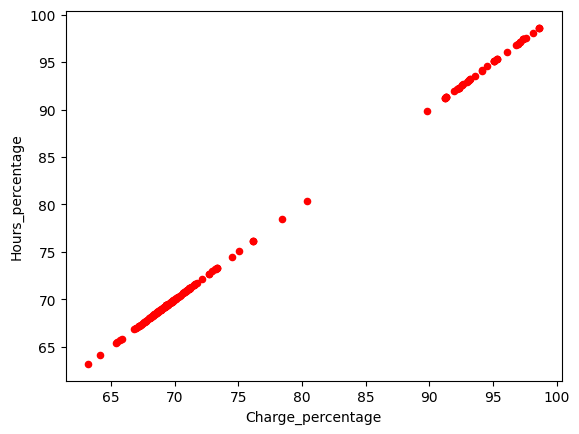

In [197]:
df[['Charge_percentage','Hours_percentage']].plot(kind='scatter',x='Charge_percentage',y='Hours_percentage',color='red')

c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Period_date', ylabel='Full_charge_h'>

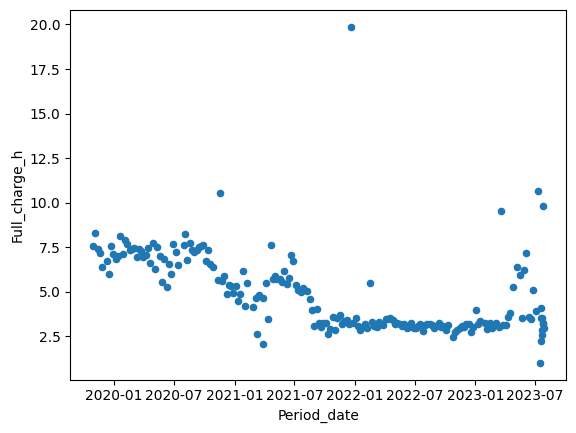

In [172]:
df[['Period_date','Full_charge_h']].plot(kind='scatter',x='Period_date',y='Full_charge_h') # trend line is decreasing
# does seem to be significant period when hours for which full charge lasts drop a lot
# 8/2020 - 2/2021 & 6/2021 - 10/2021 > aft which remains fairly constant for most part

<AxesSubplot: xlabel='Period_date'>

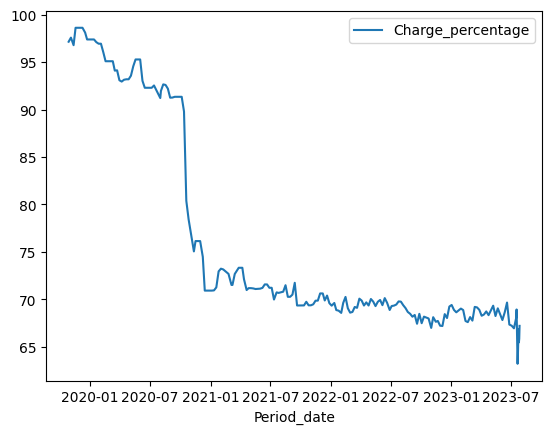

In [198]:
df[['Period_date','Charge_percentage']].plot(kind='line',x='Period_date',y='Charge_percentage') # especially clear in this graph
# notably btw 7/2020 & 1/2021

c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Period_date', ylabel='Charge_percentage'>

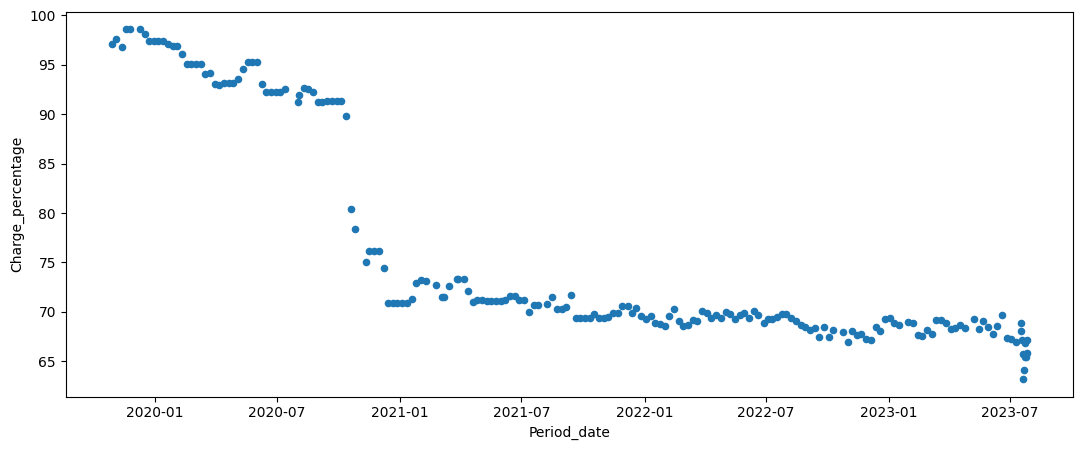

In [174]:
df[['Period_date','Charge_percentage']].plot(kind='scatter',x='Period_date',y='Charge_percentage',figsize=(13,5))
# enhance a lil bit more aaaand

1st Recorded Date of Battery: 2019-10-28


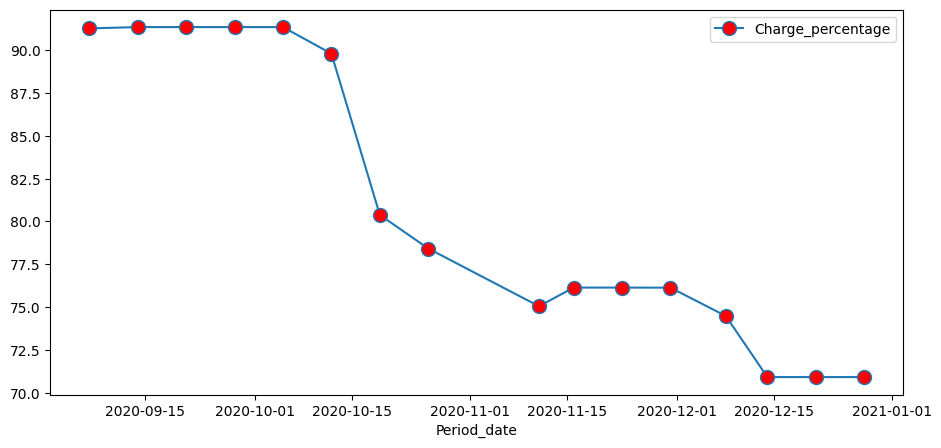

In [214]:
# presto!
df[(df['Period_date']>dt.date(2020,9,1)) & (df['Period_date']<dt.date(2021,1,1))].plot(kind='line',marker='o',markersize=10,markerfacecolor='red',x='Period_date',y='Charge_percentage',figsize=(11,5))
# interesting that the sudden drop in battery % occured very close to the 1 year mark of the laptop's acquisition
print('1st Recorded Date of Battery:',df['Period_date'].min())
# causes unknown still > could be new installation at the time; but then again> have been adding multiple things to com > battery hasn't 
# had as rapid a decrease in performance as during that interval - noteworthy, tho inconclusive